<a href="https://colab.research.google.com/github/rachocr/CCMACLRL_EXAM/blob/main/Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Dataset File

In [16]:
dataset_url = 'https://github.com/robitussin/CCMACLRL_EXAM/blob/a46a4e2a001dedaefc9b431d480b508ce86c2d96/datasets/train.csv?raw=true'
df = pd.read_csv(dataset_url)


In [17]:
df.dropna(inplace=True)

In [18]:
df.isnull().sum()

,0
id,0
brand,0
model,0
model_year,0
milage,0
fuel_type,0
engine,0
transmission,0
ext_col,0
int_col,0


In [19]:
df.sample(10)

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
185938,185938,Mercedes-Benz,E-Class E 400,2016,59500,Gasoline,329.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,A/T,Silver,Black,None reported,Yes,23000
142348,142348,Chevrolet,Suburban LT,2007,87500,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,6-Speed A/T,White,Black,None reported,Yes,26000
101926,101926,INFINITI,G35 Base,2007,184421,Gasoline,306.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,6-Speed M/T,Gray,Black,At least 1 accident or damage reported,Yes,7750
17295,17295,Cadillac,Escalade Premium Luxury Platinum,2021,5409,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,Yes,82150
142884,142884,Mercedes-Benz,A-Class A 220 4MATIC,2015,101800,Gasoline,201.0HP 1.8L 4 Cylinder Engine Gasoline Fuel,A/T,Silver,Black,None reported,Yes,12750
73126,73126,Jeep,Sky Red Line,2010,106700,Gasoline,181.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,8-Speed A/T,Blue,Black,None reported,Yes,7000
60069,60069,Audi,A5 2.0T Premium,2020,23600,Gasoline,247.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Blue,Brown,None reported,Yes,55000
16795,16795,Cadillac,XTS Luxury,2018,26000,Gasoline,304.0HP 3.6L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,At least 1 accident or damage reported,Yes,31000
19436,19436,Chevrolet,Corvette Stingray w/2LT,2021,1800,Gasoline,490.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Red,None reported,Yes,71995
28471,28471,Jeep,Golf GTI 2.0T SE 4-Door,2016,89148,Gasoline,210.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed M/T,Black,Black,None reported,Yes,13500


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162610 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            162610 non-null  int64 
 1   brand         162610 non-null  object
 2   model         162610 non-null  object
 3   model_year    162610 non-null  int64 
 4   milage        162610 non-null  int64 
 5   fuel_type     162610 non-null  object
 6   engine        162610 non-null  object
 7   transmission  162610 non-null  object
 8   ext_col       162610 non-null  object
 9   int_col       162610 non-null  object
 10  accident      162610 non-null  object
 11  clean_title   162610 non-null  object
 12  price         162610 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 17.4+ MB


In [21]:
df.isnull().sum()

,0
id,0
brand,0
model,0
model_year,0
milage,0
fuel_type,0
engine,0
transmission,0
ext_col,0
int_col,0


<Axes: xlabel='engine', ylabel='price'>

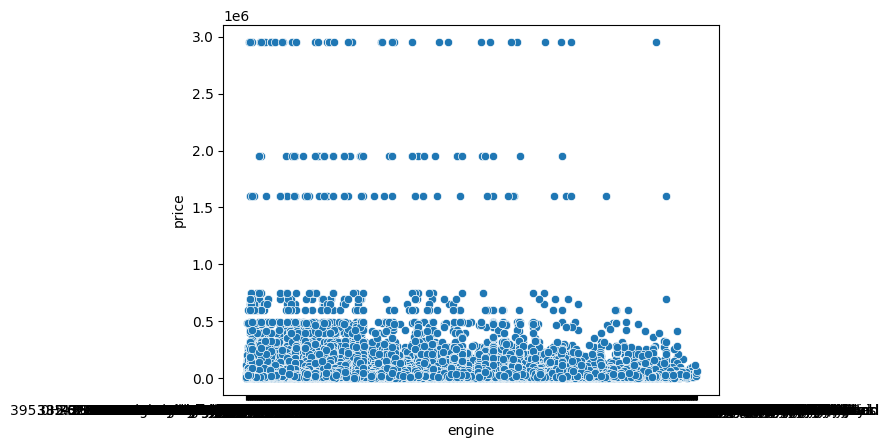

In [22]:
sns.scatterplot(y=df['price'],x=df['engine'])

In [23]:
data=df.copy()
data = data.drop(['id'], axis=1)


In [24]:
data.sample(5)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
84362,Ford,F-150 XLT,2017,87500,Gasoline,365.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Gray,None reported,Yes,31000
84252,Ford,Bronco Sport Outer Banks,2021,33704,Gasoline,1.5L I3 12V PDI DOHC Turbo,8-Speed Automatic,Tungsten Metallic,Navy Pier,None reported,Yes,47645
86058,Dodge,Charger R/T,2017,53850,Gasoline,370.0HP 5.7L 8 Cylinder Engine Gasoline Fuel,5-Speed A/T,Gray,Black,None reported,Yes,21900
144306,Subaru,Forester Premium,2023,9275,Gasoline,2.5L H4 16V GDI DOHC,Automatic CVT,Crystal Black Silica,Black,None reported,Yes,28991
159406,Toyota,Highlander Platinum,2022,5500,Gasoline,295.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,CVT Transmission,Black,Black,None reported,Yes,36500


In [25]:
categoricals = ["brand", "model", "model_year","milage", "fuel_type", "engine", "transmission", "accident", "clean_title", "ext_col",	"int_col"]

for c in categoricals:
    data[c] = pd.Categorical(df[c]).codes


In [26]:
data.sample(10)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
51126,0,994,20,5049,2,556,16,298,14,1,0,13995
185243,4,50,21,3385,2,550,16,298,10,1,0,19500
21559,55,345,18,5398,2,106,49,28,10,0,0,5500
177053,27,918,28,2082,2,907,38,28,14,1,0,63000
16013,44,10,31,1531,2,776,31,298,14,1,0,46500
105528,21,689,30,1258,2,341,38,126,10,1,0,47000
52959,36,1052,30,4521,2,968,23,28,10,1,0,111000
73123,17,461,19,3544,2,79,12,298,71,1,0,16995
19353,4,99,29,2691,2,191,32,126,14,0,0,39687
70608,38,938,18,4744,2,476,12,257,14,1,0,11500


<Axes: xlabel='model', ylabel='price'>

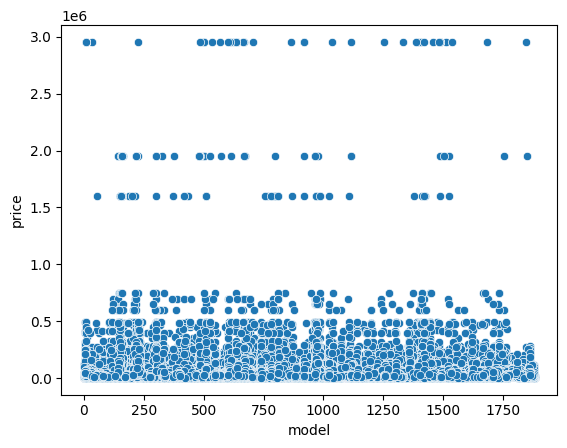

In [27]:
sns.scatterplot(y=data['price'],x=data['model'])

In [28]:
#build model
X = data.drop(['price', "brand",	"model", "fuel_type", "transmission", "ext_col"	, "int_col"],axis=1)
y = data['price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [29]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
unscaled_df = pd.DataFrame(X_train, columns=X.columns)
unscaled_df.head()



,model_year,milage,engine,accident,clean_title
131067,30,1245,567,1,0
21987,20,4327,160,0,0
23344,30,1216,849,1,0
76061,29,1525,360,1,0
179149,15,5560,550,0,0


In [31]:
scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
scaled_df.head()

,model_year,milage,engine,accident,clean_title
0,0.909091,0.212748,0.516864,1.0,0.0
1,0.606061,0.739405,0.145852,0.0,0.0
2,0.909091,0.207792,0.773929,1.0,0.0
3,0.878788,0.260595,0.328168,1.0,0.0
4,0.454545,0.950103,0.501367,0.0,0.0


In [32]:
model = LinearRegression()

In [33]:
model.fit(X_train_scaled, y_train)

LinearRegression()

In [34]:
y_pred = model.predict(X_test_scaled)


In [35]:
olsmod = sm.OLS(y_test, X_test_scaled).fit()
olsmod.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.286
Model:                            OLS   Adj. R-squared (uncentered):              0.286
Method:                 Least Squares   F-statistic:                              4892.
Date:                Fri, 20 Sep 2024   Prob (F-statistic):                        0.00
Time:                        12:11:53   Log-Likelihood:                     -6.1761e+05
No. Observations:               48783   AIC:                                  1.235e+06
Df Residuals:                   48779   BIC:                                  1.235e+06
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          4.908e+04   1463.295     33.543      0.000    4.62e+04     5.2e+04
x2         -4.641e+04    978.997    -47.411      0.000   -4.83e+04   -4.45e+04
x3          4.354e+04   1482.554     29.370      0.000    4.06e+04    4.64e+04
x4          6793.6646    816.547      8.320      0.000    5193.223    8394.107
const               0          0        nan        nan           0           0
==============================================================================
Omnibus:                   117161.150   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1405375197.054
Skew:                          24.956   Prob(JB):                         0.00
Kurtosis:                     833.011   Cond. No.                          inf
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [36]:
olsmod = sm.OLS(y_test, X_test_scaled).fit()
olsmod.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.286
Model:                            OLS   Adj. R-squared (uncentered):              0.286
Method:                 Least Squares   F-statistic:                              4892.
Date:                Fri, 20 Sep 2024   Prob (F-statistic):                        0.00
Time:                        12:11:53   Log-Likelihood:                     -6.1761e+05
No. Observations:               48783   AIC:                                  1.235e+06
Df Residuals:                   48779   BIC:                                  1.235e+06
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          4.908e+04   1463.295     33.543      0.000    4.62e+04     5.2e+04
x2         -4.641e+04    978.997    -47.411      0.000   -4.83e+04   -4.45e+04
x3          4.354e+04   1482.554     29.370      0.000    4.06e+04    4.64e+04
x4          6793.6646    816.547      8.320      0.000    5193.223    8394.107
const               0          0        nan        nan           0           0
==============================================================================
Omnibus:                   117161.150   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1405375197.054
Skew:                          24.956   Prob(JB):                         0.00
Kurtosis:                     833.011   Cond. No.                          inf
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [37]:
mean_squared_error(y_test, y_pred, squared=False)

76003.30607949632

## Test File

In [38]:
test_url = 'https://github.com/robitussin/CCMACLRL_EXAM/blob/a46a4e2a001dedaefc9b431d480b508ce86c2d96/datasets/test.csv?raw=true'
dt=pd.read_csv(test_url)

In [39]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125690 entries, 0 to 125689
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            125690 non-null  int64 
 1   brand         125690 non-null  object
 2   model         125690 non-null  object
 3   model_year    125690 non-null  int64 
 4   milage        125690 non-null  int64 
 5   fuel_type     122307 non-null  object
 6   engine        125690 non-null  object
 7   transmission  125690 non-null  object
 8   ext_col       125690 non-null  object
 9   int_col       125690 non-null  object
 10  accident      124058 non-null  object
 11  clean_title   111451 non-null  object
dtypes: int64(3), object(9)
memory usage: 11.5+ MB


In [40]:


categoricals = ["brand", "model", "model_year","milage", "fuel_type", "engine", "transmission", "accident", "clean_title", "ext_col",	"int_col"]

for c in categoricals:
    dt[c] = pd.Categorical(dt[c]).codes

data_test = dt.drop(["id", "brand",	"model", "fuel_type", "transmission", "ext_col"	, "int_col"],axis=1)

scaler = MinMaxScaler()
scaler.fit(data_test)
data_test_scaled = scaler.transform(data_test)
y_pred = model.predict(data_test_scaled)



## Sample Submission File

In [41]:
sample_submission_url = 'https://github.com/robitussin/CCMACLRL_EXAM/blob/a46a4e2a001dedaefc9b431d480b508ce86c2d96/datasets/sample_submission.csv?raw=true'

sf=pd.read_csv(sample_submission_url)

In [42]:
id = sf.pop('id')

# Create a submission DataFrame
submission_df = pd.DataFrame({
    'id': id,
    'class': y_pred
})

# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission_file.csv', index=False)
print("Submission file created: submission_file.csv")

Submission file created: submission_file.csv
